In [11]:
import quantumsymmetry
import numpy as np
import openfermion

mol_name = "CH2"
atom = "C 0 0 0.1027; H 0 1.0042 -0.3081; H 0 -1.0042 -0.3081"
charge = 0
spin = 0
basis_set = "sto-3g"

ham = quantumsymmetry.reduced_hamiltonian(atom=atom, basis=basis_set, charge=charge, spin=spin, verbose=False)

In [35]:
bond_lengths = np.around(np.arange(0.1,3.0,0.1),2)

ground_states = []
first_es_states = []
second_es_states = []
third_es_states = []

for bond_length in bond_lengths:
    bond_angle = np.deg2rad(22.2485793248)
    geom = (f"C 0 0 0; "
                f"H 0 {np.round(bond_length*np.cos(bond_angle),4)} {-np.round(bond_length*np.sin(bond_angle),4)}; "
                f"H 0 {-np.round(bond_length*np.cos(bond_angle))} {np.round(bond_length*np.sin(bond_angle),4)}")
    
    sym_ham = quantumsymmetry.reduced_hamiltonian(atom=geom, basis=basis_set, charge=charge, spin=spin, verbose=False)
    matrix = openfermion.linalg.get_sparse_operator(sym_ham)
    ground_state, _ = openfermion.linalg.get_ground_state(matrix)
    ground_states.append(ground_state)
    print(ground_state)

53.736817994793206
-17.377449252153472
-29.185033303481106
-38.09330911666681
-38.31632841329413
-38.3535517403695
-38.32615067570327
-38.28064654069216
-38.211974562423855
-38.19189237253144
-38.179679985896506
-38.173036367647214
-38.16914130611326
-38.16645027328741
-38.15368187055206


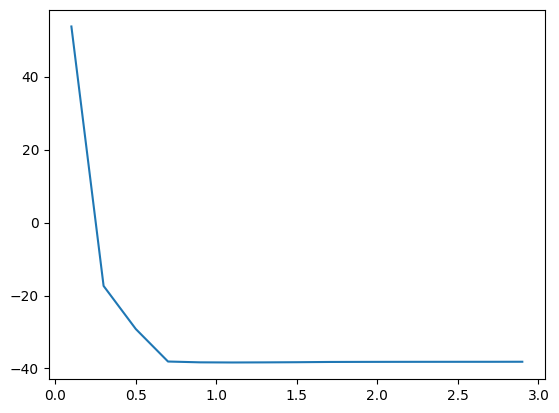

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(bond_lengths, ground_states)
